<a href="https://www.kaggle.com/code/pedro2318/pmr3508-2018-66f39f7a58-tarefa2?scriptVersionId=117503733" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

EP2 - PMR3508-2018-66f39f7a58
DETECÇÃO DE SPAM

1. FOI IMPORTADO INICIALMENTE AS BIBLIOTECAS QUE SE USARIAM E O ARQUIVO PARA TREINO DO CLASSIFICADOR.

In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir("../input/pmr-3508-tarefa-2"))

['spambase.DOCUMENTATION', 'sample_submission_1.csv', 'sample_submission_2.csv', 'train_data.csv', 'test_features.csv']


In [2]:
trainep2 = pd.read_csv("../input/ep22018/train_data.csv", engine='python')

In [3]:
trainep2.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham,Id
0,0.0,14.28,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,1.800,5,9,True,1947
1,0.0,0.00,1.0,0.0,0.50,0.0,0.0,0.00,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.00,2.50,0.0,1.50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.357,0.0,0.892,0.000,0.0,2.000,19,172,False,2159
2,0.0,0.00,0.0,0.0,0.00,0.0,0.0,1.29,0.0,0.43,0.0,0.0,0.0,0.0,0.0,0.43,0.0,1.73,0.43,0.0,0.43,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124,0.0,0.310,0.062,0.0,1.477,8,65,False,4223
3,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,2.7,0.0,0.0,0.0,0.00,0.0,0.00,2.70,0.0,2.70,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.444,0.000,0.0,2.800,7,28,True,2624
4,0.0,0.00,0.0,0.0,1.17,0.0,0.0,0.00,0.0,1.17,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,2.35,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.17,1.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,1.551,10,45,True,2743


2. EM SEGUIDA É VISTO SE TODA A TEBELA ESTÁ COMPLETA E FOI SEPARADO EM DUAS TABELAS, UMA SENDO DE SPAM E A OUTRA DE RAM

In [4]:
trainep2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 59 columns):
word_freq_make                3680 non-null float64
word_freq_address             3680 non-null float64
word_freq_all                 3680 non-null float64
word_freq_3d                  3680 non-null float64
word_freq_our                 3680 non-null float64
word_freq_over                3680 non-null float64
word_freq_remove              3680 non-null float64
word_freq_internet            3680 non-null float64
word_freq_order               3680 non-null float64
word_freq_mail                3680 non-null float64
word_freq_receive             3680 non-null float64
word_freq_will                3680 non-null float64
word_freq_people              3680 non-null float64
word_freq_report              3680 non-null float64
word_freq_addresses           3680 non-null float64
word_freq_free                3680 non-null float64
word_freq_business            3680 non-null float64
word_freq

In [5]:
trainep2.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Id
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,0.099677,0.223353,0.279019,0.069117,0.314897,0.096147,0.113372,0.107397,0.088519,0.242079,0.060258,0.548603,0.092870,0.060111,0.047293,0.253563,0.135231,0.182283,1.620288,0.086049,0.802462,0.127712,0.096622,0.094367,0.558258,0.269780,0.757970,0.126576,0.096625,0.102079,0.064573,0.045193,0.093389,0.045853,0.106546,0.097226,0.140606,0.015424,0.072405,0.063209,0.042106,0.135630,0.047595,0.069590,0.304848,0.183492,0.004562,0.030168,0.041071,0.138068,0.017707,0.273364,0.075168,0.043326,5.364929,52.831250,283.316304,2297.439674
std,0.298270,1.337420,0.508617,1.438505,0.697633,0.277443,0.400638,0.411901,0.265593,0.671435,0.202208,0.879125,0.303551,0.352150,0.251302,0.818586,0.430279,0.534366,1.741604,0.442830,1.194947,1.053537,0.338925,0.457785,1.684545,0.881973,3.354167,0.539070,0.583032,0.447371,0.408068,0.320268,0.543834,0.321096,0.546628,0.384285,0.431713,0.245410,0.382884,0.343355,0.340430,0.769359,0.229632,0.531453,1.040531,0.919031,0.061772,0.292487,0.257327,0.268595,0.111465,0.872148,0.239671,0.345457,33.811679,210.367337,623.433481,1324.109165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.590000,6.000000,34.000000,1160.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.280000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [6]:
trainep2_nospam = trainep2.query('ham == 1')
trainep2_spam = trainep2.query('ham == 0')

In [7]:
trainep2_nospam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham,Id
0,0.0,14.28,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.800,5,9,True,1947
3,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,2.7,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.444,0.000,0.000,2.800,7,28,True,2624
4,0.0,0.00,0.0,0.0,1.17,0.0,0.0,0.0,0.0,1.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.17,1.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.551,10,45,True,2743
5,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.022,0.022,0.019,0.022,0.022,0.022,3.482,5,5902,True,3451
7,0.0,3.03,0.0,0.0,0.00,0.0,0.0,0.0,0.0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.03,0.0,0.0,0.0,0.0,0.0,3.03,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,2.769,21,36,True,3219


In [8]:
trainep2_nospam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Id
count,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000
mean,0.069374,0.258156,0.200013,0.001097,0.188223,0.047024,0.009427,0.039778,0.037175,0.172821,0.022372,0.545269,0.060800,0.046144,0.008920,0.073621,0.046735,0.101857,1.231231,0.008490,0.434807,0.052466,0.007308,0.018734,0.903261,0.436455,1.238072,0.194016,0.157677,0.164016,0.104718,0.073465,0.143207,0.073661,0.170347,0.139609,0.199782,0.022026,0.110036,0.082248,0.068836,0.220138,0.072230,0.110458,0.420413,0.291830,0.007041,0.048045,0.053084,0.155570,0.023539,0.117427,0.012902,0.024232,2.397710,18.269658,158.898267,2307.981786
std,0.287092,1.684234,0.506431,0.023739,0.648290,0.237570,0.116635,0.251647,0.176551,0.684191,0.148004,0.997663,0.257571,0.370977,0.097437,0.535992,0.206296,0.418087,1.735453,0.102052,1.019737,0.662100,0.070010,0.297222,2.078802,1.093480,4.219124,0.625179,0.739046,0.560324,0.516885,0.406769,0.684528,0.406902,0.690346,0.471756,0.492375,0.310607,0.480376,0.423496,0.433194,0.974158,0.287841,0.674957,1.291529,1.158117,0.078392,0.372259,0.319001,0.237158,0.136592,0.903607,0.076136,0.268303,5.553436,41.646434,348.285613,1321.717448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.379500,4.000000,18.000000,1170.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [9]:
trainep2_spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham,Id
1,0.0,0.0,1.00,0.0,0.50,0.0,0.00,0.00,0.0,0.50,0.0,0.00,0.0,0.0,0.0,0.50,0.00,0.00,2.50,0.00,1.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.5,0.0,0.00,0.0,0.0,0.357,0.0,0.892,0.000,0.0,2.000,19,172,False,2159
2,0.0,0.0,0.00,0.0,0.00,0.0,0.00,1.29,0.0,0.43,0.0,0.00,0.0,0.0,0.0,0.43,0.00,1.73,0.43,0.00,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.124,0.0,0.310,0.062,0.0,1.477,8,65,False,4223
6,0.0,0.0,0.37,0.0,0.00,0.0,0.37,0.00,0.0,0.00,0.0,0.37,0.0,0.0,0.0,0.74,0.37,0.37,0.74,0.37,0.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.37,0.0,0.0,0.0,0.0,0.0,0.0,0.37,0.0,0.0,0.302,0.0,0.241,0.060,0.0,2.166,18,143,False,464
14,0.0,0.0,0.00,0.0,2.17,0.0,0.00,0.00,0.0,0.00,0.0,2.17,0.0,0.0,0.0,2.17,0.00,2.17,6.52,0.00,2.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.000,0.000,0.0,1.333,5,16,False,231
15,0.0,0.0,0.00,0.0,0.94,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,1.88,0.00,2.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.428,0.000,0.0,4.652,31,107,False,4466


In [10]:
trainep2_spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Id
count,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.00000,1429.000000,1429.000000,1429.000000,1429.0,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000
mean,0.147411,0.168530,0.403471,0.176263,0.514437,0.173527,0.277110,0.213912,0.169398,0.351176,0.119937,0.553856,0.143387,0.082113,0.107740,0.537012,0.274633,0.308971,2.233142,0.208223,1.381603,0.246242,0.237313,0.213506,0.014801,0.007229,0.001700,0.020343,0.000455,0.004514,0.001337,0.000658,0.014913,0.002050,0.006046,0.030462,0.04739,0.005024,0.013128,0.033219,0.0,0.002512,0.008789,0.005213,0.122806,0.012834,0.000658,0.002008,0.022148,0.110498,0.008519,0.519001,0.173251,0.073404,10.038973,107.273618,479.303009,2280.833450
std,0.309208,0.365846,0.486859,2.304675,0.725629,0.315578,0.590113,0.564594,0.349169,0.635943,0.254952,0.650250,0.358727,0.319146,0.376518,1.068764,0.614927,0.658780,1.566699,0.681459,1.221306,1.464878,0.505804,0.614409,0.136757,0.085529,0.036942,0.338199,0.006206,0.073252,0.038798,0.017577,0.116539,0.040144,0.048772,0.150017,0.28977,0.054535,0.091367,0.140258,0.0,0.026941,0.053320,0.055504,0.327052,0.122791,0.011089,0.027538,0.098353,0.309841,0.049738,0.757922,0.350882,0.438813,53.488347,326.239500,864.507424,1328.161288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180000,0.000000,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.092000,0.000000,0.000000,2.350000,16.000000,91.000000,1150.000000
50%,0.000000,0.000000,0.290000,0.000000,0.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.430000,0.000000,0.000000,0.000000,0.130000,0.000000,0.000000,2.120000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

3. PARA MELHOR VISUALIZAÇÃO DA MÉDIA ONDE OS AS PALAVAS APARECEM COM MAIOR FEQUENCIA FOI FEITO O GRÁFICO ABAIXO.

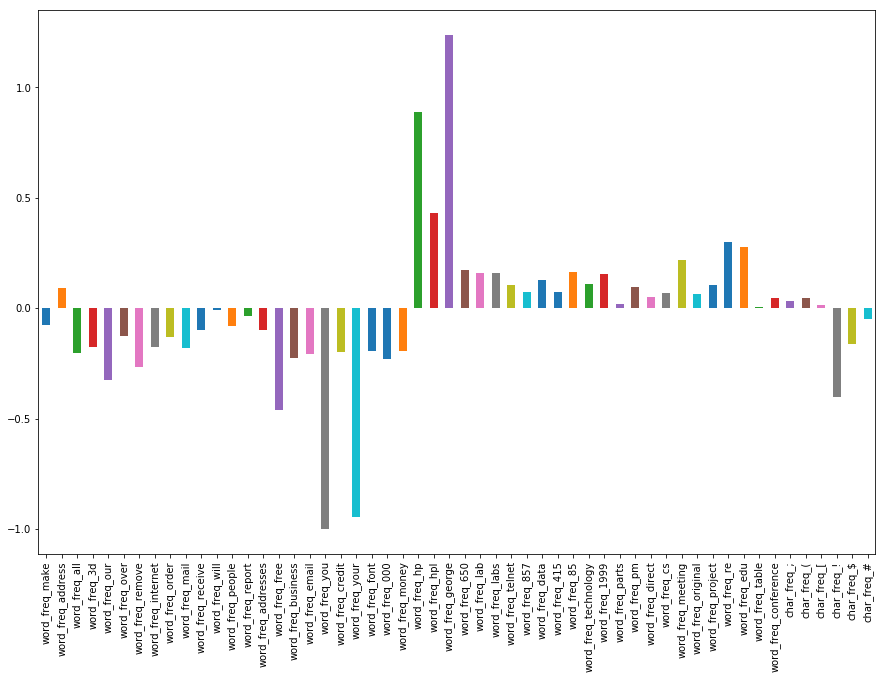

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
(trainep2[trainep2['ham'] == True].mean() - trainep2[trainep2['ham'] == False].mean())[trainep2.columns[:54]].plot(kind = 'bar')

COM ISSO FOI POSSÍVEL VERIFICAR QUE OS EMAIL SPAM POSSUIAM PALAVRAS COMO FREE, YOU, CREDIT, YOUR, 000, ! E $.

Text(0.5,0,'Tipo')

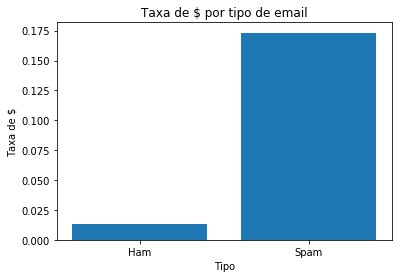

In [12]:
trainep2_nospam_cifrao = np.mean(trainep2_nospam['char_freq_$'])
trainep2_spam_cifrao = np.mean(trainep2_spam['char_freq_$'])

locations = [1, 2]
heights = [trainep2_nospam_cifrao, trainep2_spam_cifrao]
labels = ["Ham", "Spam"]
plt.bar(locations, heights, tick_label=labels)
plt.title('Taxa de $ por tipo de email')
plt.ylabel('Taxa de $')
plt.xlabel('Tipo')

Text(0.5,0,'Tipo')

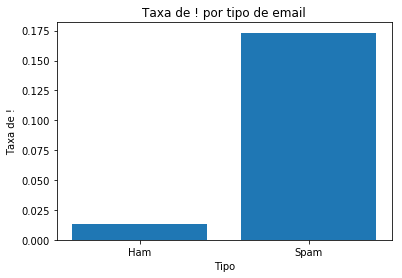

In [13]:
trainep2_nospam_exclamacao = np.mean(trainep2_nospam['char_freq_!'])
trainep2_spam_exclamacao = np.mean(trainep2_spam['char_freq_!'])

locations = [1, 2]
heights = [trainep2_nospam_cifrao, trainep2_spam_cifrao]
labels = ["Ham", "Spam"]
plt.bar(locations, heights, tick_label=labels)
plt.title('Taxa de ! por tipo de email')
plt.ylabel('Taxa de !')
plt.xlabel('Tipo')

Text(0.5,0,'Tipo')

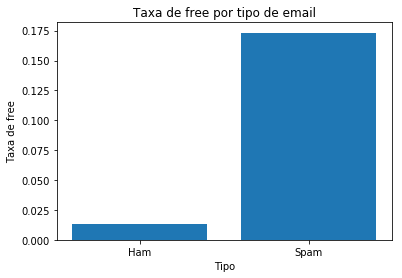

In [14]:
trainep2_nospam_free = np.mean(trainep2_nospam['word_freq_free'])
trainep2_spam_free = np.mean(trainep2_spam['word_freq_free'])
locations = [1, 2]
heights = [trainep2_nospam_cifrao, trainep2_spam_cifrao]
labels = ["Ham", "Spam"]
plt.bar(locations, heights, tick_label=labels)
plt.title('Taxa de free por tipo de email')
plt.ylabel('Taxa de free')
plt.xlabel('Tipo')

Text(0.5,0,'Tipo')

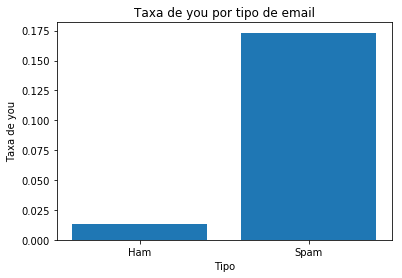

In [15]:
trainep2_nospam_free = np.mean(trainep2_nospam['word_freq_you'])
trainep2_spam_free = np.mean(trainep2_spam['word_freq_you'])
locations = [1, 2]
heights = [trainep2_nospam_cifrao, trainep2_spam_cifrao]
labels = ["Ham", "Spam"]
plt.bar(locations, heights, tick_label=labels)
plt.title('Taxa de you por tipo de email')
plt.ylabel('Taxa de you')
plt.xlabel('Tipo')

Text(0.5,0,'Tipo')

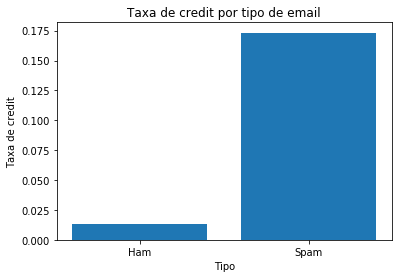

In [16]:
trainep2_nospam_free = np.mean(trainep2_nospam['word_freq_credit'])
trainep2_spam_free = np.mean(trainep2_spam['word_freq_credit'])
locations = [1, 2]
heights = [trainep2_nospam_cifrao, trainep2_spam_cifrao]
labels = ["Ham", "Spam"]
plt.bar(locations, heights, tick_label=labels)
plt.title('Taxa de credit por tipo de email')
plt.ylabel('Taxa de credit')
plt.xlabel('Tipo')

Text(0.5,0,'Tipo')

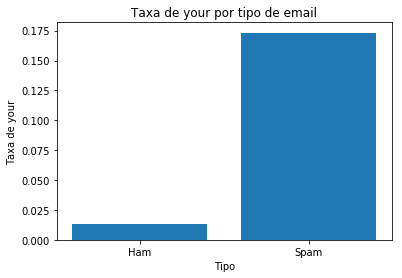

In [17]:
trainep2_nospam_free = np.mean(trainep2_nospam['word_freq_your'])
trainep2_spam_free = np.mean(trainep2_spam['word_freq_your'])
locations = [1, 2]
heights = [trainep2_nospam_cifrao, trainep2_spam_cifrao]
labels = ["Ham", "Spam"]
plt.bar(locations, heights, tick_label=labels)
plt.title('Taxa de your por tipo de email')
plt.ylabel('Taxa de your')
plt.xlabel('Tipo')

Text(0.5,0,'Tipo')

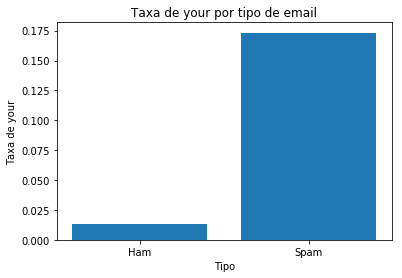

In [18]:
trainep2_nospam_free = np.mean(trainep2_nospam['word_freq_000'])
trainep2_spam_free = np.mean(trainep2_spam['word_freq_000'])
locations = [1, 2]
heights = [trainep2_nospam_cifrao, trainep2_spam_cifrao]
labels = ["Ham", "Spam"]
plt.bar(locations, heights, tick_label=labels)
plt.title('Taxa de your por tipo de email')
plt.ylabel('Taxa de your')
plt.xlabel('Tipo')

4. COM AS COLUNAS SELECIONADAS DESENVOLVEU-SE OS CLASSIFICADORES PARA QUE SE FOSSE POSSÍVEL VERIFICAR QUAL O QUE FICARIA MELHOR.

In [19]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.model_selection import cross_val_score

In [20]:
Xtrainep2 = trainep2[["char_freq_$","char_freq_!","word_freq_free","word_freq_you","word_freq_credit","word_freq_your","word_freq_000"]]

In [21]:
Ytrainep2 = trainep2['ham']

In [22]:
porcentagemacerto =0
melhorvizinhomelhorneighbors = 0
for vizinhosTemp in range(3,20,1):
    knn = KNeighborsClassifier(n_neighbors=vizinhosTemp)
    scores = cross_val_score(knn, Xtrainep2, Ytrainep2, cv=10)
    scores
    if scores.mean() > porcentagemacerto:
        porcentagemacerto = scores.mean()
        melhorvizinho = vizinhosTemp

In [23]:
porcentagemacerto

0.8619467235351775

In [24]:
melhorvizinho

7

In [25]:
    gnb = GaussianNB()
    scores = cross_val_score(gnb, Xtrainep2, Ytrainep2, cv=10, n_jobs=-1, scoring='roc_auc')

In [26]:
print('Gaussian: {0:.2f}%'.format(np.mean(scores)*100))

Gaussian: 89.23%


In [27]:
gnb = BernoulliNB()
scores = cross_val_score(gnb, Xtrainep2, Ytrainep2, cv=10, n_jobs=-1, scoring='roc_auc')


In [28]:
print('Bernoulli: {0:.2f}%'.format(np.mean(scores)*100))

Bernoulli: 89.77%


In [29]:
gnb = MultinomialNB()
scores = cross_val_score(gnb, Xtrainep2, Ytrainep2, cv=10, n_jobs=-1, scoring='roc_auc')

In [30]:
print('Multinomial: {0:.2f}%'.format(np.mean(scores)*100))

Multinomial: 74.82%


In [31]:
gnb = ComplementNB()
score = cross_val_score(gnb, Xtrainep2, Ytrainep2, cv=10, n_jobs=-1, scoring='roc_auc')

In [32]:
print('Complement: {0:.2f}%'.format(np.mean(scores)*100))

Complement: 74.82%


<BarContainer object of 4 artists>

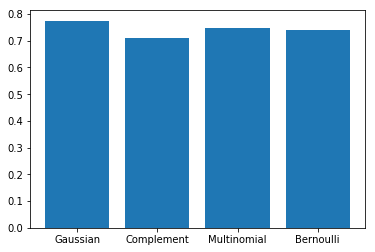

In [33]:
plt.bar(['Gaussian', 'Complement', 'Multinomial', 'Bernoulli'], height=[scores[0], scores[1], scores[2], scores[3]])

5. COM ISSO FOI POSSÍVEL VERIFICAR QUE O MELHOR CLASSIFICADOR COM AS COLUNAS ESCOLHIDAS FOI O NAIVE BAYES DE BERNOULLI. ASSIM FOI UTILIZADO ESSE CLASSIFICADOR NO TABELA DE TESTE. E POR FIM OBTEVE-SE O RESULTADO RES

In [34]:
testeep2 = pd.read_csv("../input/ep22018/test_features.csv")
testeep2.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Id
0,0.0,0.00,0.17,0.52,0.17,0.00,0.17,0.0,0.69,0.17,0.17,0.00,0.00,0.0,0.0,1.74,0.0,0.69,1.04,0.0,0.17,0.0,0.0,0.0,0.17,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.34,0.0,0.0,0.17,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.072,0.0,0.754,0.681,0.0,4.740,52,967,1351
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,3.33,0.00,0.0,0.0,0.00,0.0,0.00,3.33,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,3.33,0.0,3.33,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,1.142,3,16,1687
2,0.0,0.16,0.49,0.00,0.00,0.16,0.00,0.0,0.00,0.49,0.00,0.16,0.32,0.0,0.0,0.00,0.0,0.00,1.30,0.0,0.32,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.16,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.16,0.16,0.0,0.0,0.0,0.119,0.0,0.149,0.000,0.0,2.178,107,244,1297
3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,7.69,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,1.400,4,14,2101
4,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,16.66,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,1.250,2,5,3920


In [35]:
Xtestep2 = testeep2[["char_freq_$","char_freq_!","word_freq_free","word_freq_you","word_freq_credit","word_freq_your","word_freq_000"]]

In [36]:
gnb = BernoulliNB()
scores = cross_val_score(gnb, Xtrainep2, Ytrainep2, cv=10, n_jobs=-1, scoring='roc_auc')
scores.mean()

0.8977036915333064

In [37]:
gnb.fit(Xtrainep2, Ytrainep2)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [38]:
Ytestep2 = gnb.predict(Xtestep2)

In [39]:
RES = pd.DataFrame({"id":testeep2.Id, "ham":Ytestep2})
RES.to_csv("submission-66f39f7a58-TAREFA2.csv", index=False)
RES.head(10)

,id,ham
0,1351,False
1,1687,True
2,1297,True
3,2101,True
4,3920,True
5,3313,False
6,4102,True
7,3836,True
8,394,True
9,219,False
